## Diseño de la función objetivo que evalua la aptitud basada en la cobertura de incertidumbre de $n' \in N$ sensores 

In [18]:
#Cargando librerías 
import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

plt.style.use("ggplot")

 W = i*a^(p)


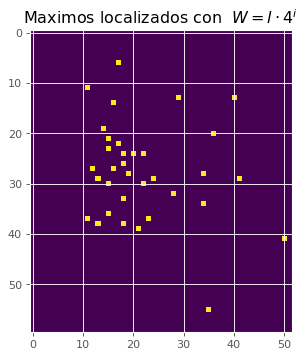

In [19]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')

W1 = ps.f5(nonsat,importance,e=9)
seeds = ps.getMax(W1)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(5, 5), dpi=80)
plt.imshow(seeds*np.max(W1)/2+W1)
plt.imshow(seeds)
plt.title("Maximos localizados con  $W = l \cdot 4^i$ ")
plt.show()

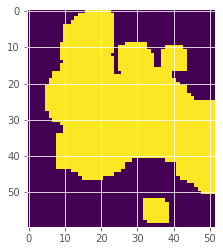

In [20]:
seeds_nonsat = nonsat>0
plt.imshow(seeds_nonsat)
coords = ps.get_coords(seeds_nonsat)

104.59


In [117]:
th = 100
atol = 15
direction_delta = 1


s = "th"+str(th)+"_atol_"+str(atol)+"_dirdelta_"+str(direction_delta)

In [24]:
variogram, varmask ,locations = ps.computeRegions(nonsat,coords,th = 100 ,atol=15,direction_delta = 1,verbose = True)

'99.94%'

Coords  [58 38]
--


In [119]:
def saveVariograms(variograms,locations,name):
    import pandas as pd

    fvm = [varmask[i].flatten() for i in range(len(varmask))]

    #storing in data frame
    df = pd.DataFrame(fvm)

    c= np.array([ps.get_coords(locations[i]) for i in range(len(locations)) ])
    cf = c.flatten()
    coords = cf.reshape(len(locations),2)
    df.insert(0,"coordsy", coords[:,0])
    df.insert(1,"coordsx", coords[:,1])
    df.to_csv(s+".csv")
    
saveVariograms(varmask,locations,s)

def readVariograms(name):
    
    

In [25]:
W1 = ps.f5(nonsat,importance,e=15)

 W = i*a^(p)


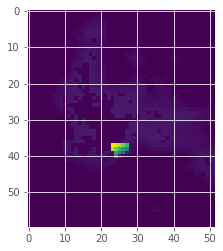

In [26]:
plt.imshow(W1)

In [27]:
ind = np.unravel_index(np.argmax(W1, axis=None), W1.shape)

W1[ind]

3041425.089341979

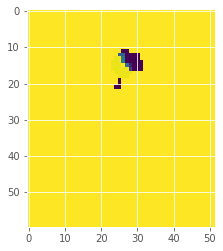

In [34]:
ix = 300
plt.imshow(1/(1+varmask[ix]))

[[15 26]]


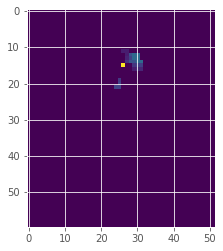

In [35]:

plt.imshow(varmask[ix]+locations[ix]*1000)
print(ps.get_coords(locations[ix]))

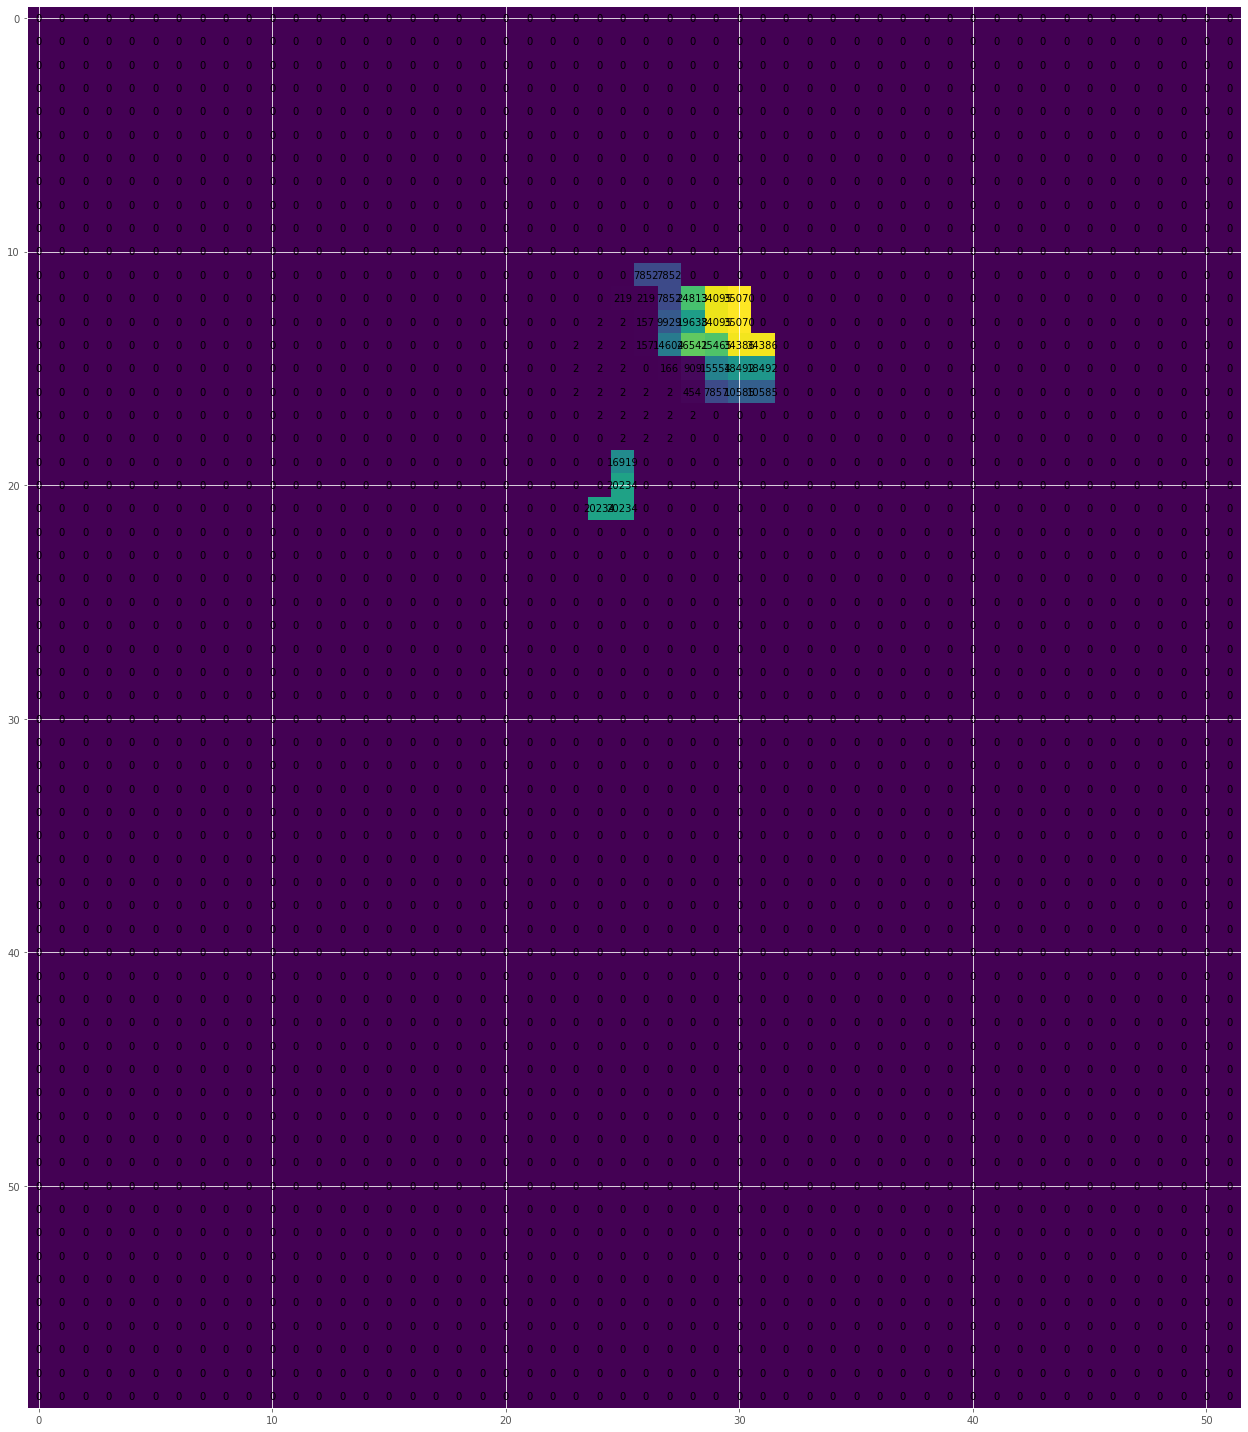

In [36]:

img = varmask[ix]

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(img)
for i in range((img.shape[0])):
    for j in range(img.shape[1]):
        text = ax.text(j, i, int(img[i, j]*100), ha="center", va="center", color="black")

#fig.title(np.sum(img))
fig.tight_layout()
plt.show()

In [282]:
np.sum(img)

481.75061948988207

In [102]:


#searching and verifying valid coordinates 
#searching and verifying valid coordinates 

def validate_coordinates(iy,ix,coords=coords):
    iy = np.where(coords[:,0]==iy)
    ix = np.where(coords[:,1]==ix)

    ix = np.intersect1d(ix,iy)
    return ix

def aptitude(X,nonsat=nonsat,varmask=varmask,only_aptitude=True):
    
    M = mapa(X, nonsat, varmask)
    
    #creamos n mapas binarios donde la cobertura de los sensores no se traslape
    mask = np.sum(M>0,axis=0)==1
    
 #   np.sum([mask]*len(M)*M)

    #return -(np.sum([mask]*len(M)*M))
    return -np.sum(np.max(M,axis=0))

                    
def mapa(X,nonsat=nonsat,varmask=varmask,W1=ps.f5(nonsat,importance,e=12.5)):
    
    
    n_sensors = int(len(X)/2)
    
    sensor_list = X.reshape(n_sensors,len(nonsat.shape))
    
    coverage = np.zeros((n_sensors,nonsat.shape[0],nonsat.shape[1]))
    
    for i,s in enumerate(sensor_list):

        sy = s[0]
        sx = s[1]
        #sy,sx = s[0],s[1]
        ix = validate_coordinates(sy,sx)
        
        coverage[i] = np.zeros(nonsat.shape)
 
        if len(ix)>0: 
            map0to1 = 1/(1+varmask[ix]) 
            coverage[i] = map0to1*(map0to1<1)*W1

 
    return coverage    
    

 W = i*a^(p)


Text(0.5, 1.0, '-2052358.4008447977')

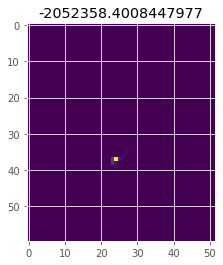

In [85]:
#[22 12 35  6]

#X = np.array([30, 30 ,20 ,20])
a = mapa(X) 

plt.imshow(np.max(a,axis=0))
plt.title(aptitude(X))

#type(X)

## Proof of concept: Solving Light Pollution Sensor Location

415
415
1513
1450
1397
516
1079
1010
755


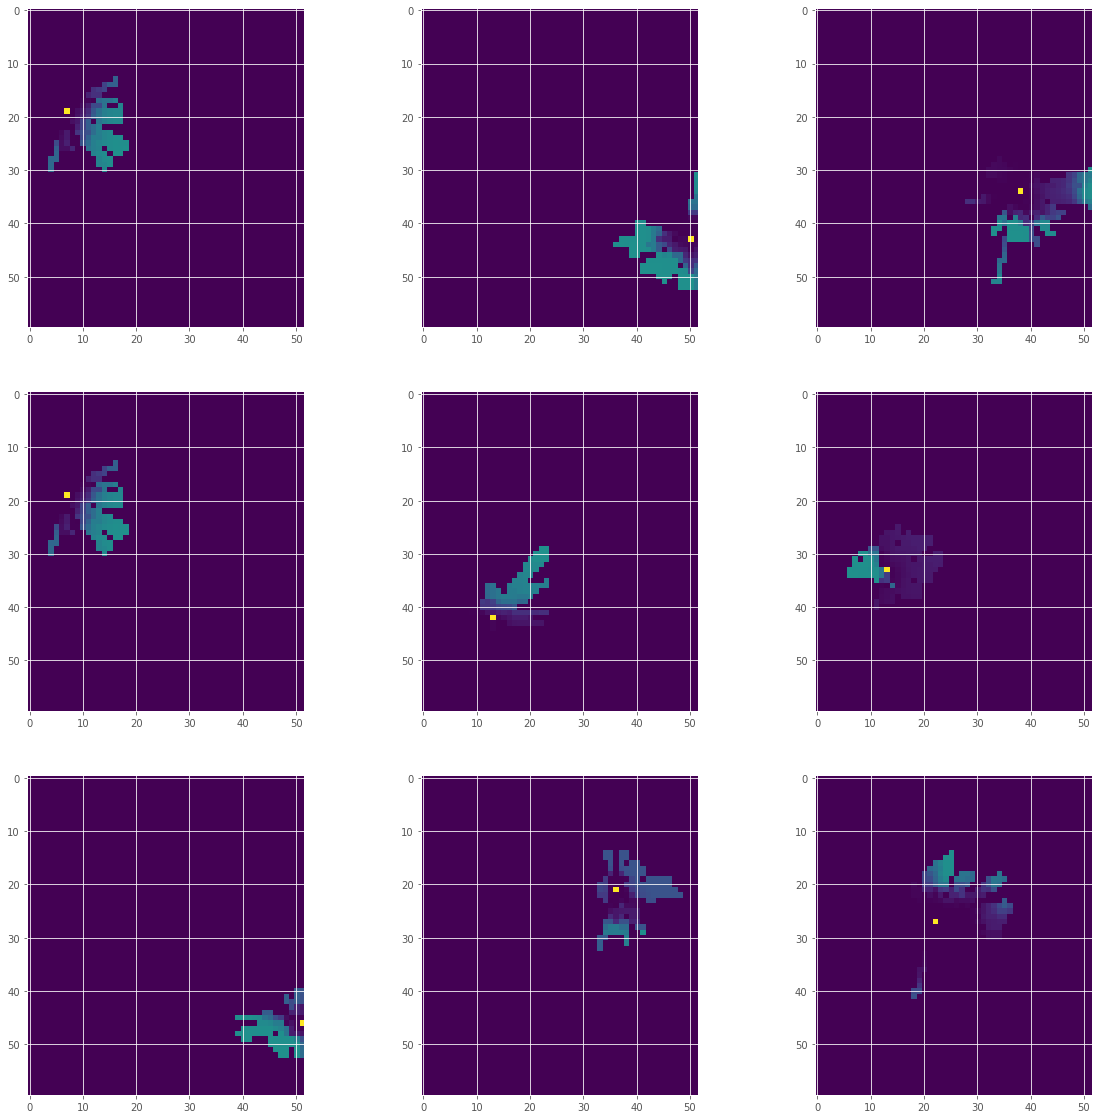

In [86]:
#!pip install geneticalgorithm
# for each locations, we have an associated region of minimum spatial variance. 

selected_locations = [np.random.randint((len(varmask))) for i in np.arange(9)]

fig, axs = plt.subplots(3, 3,figsize=(20,20))

for i,s in enumerate(selected_locations):
    print(s)
    sploty = i%3
    splotx = int(i/3)
  
    
    img = (1*(varmask[s]))
    img[coords[s][0]][coords[s][1]] = np.max(varmask[s])*2
    axs[sploty, splotx].imshow(img)

plt.show()

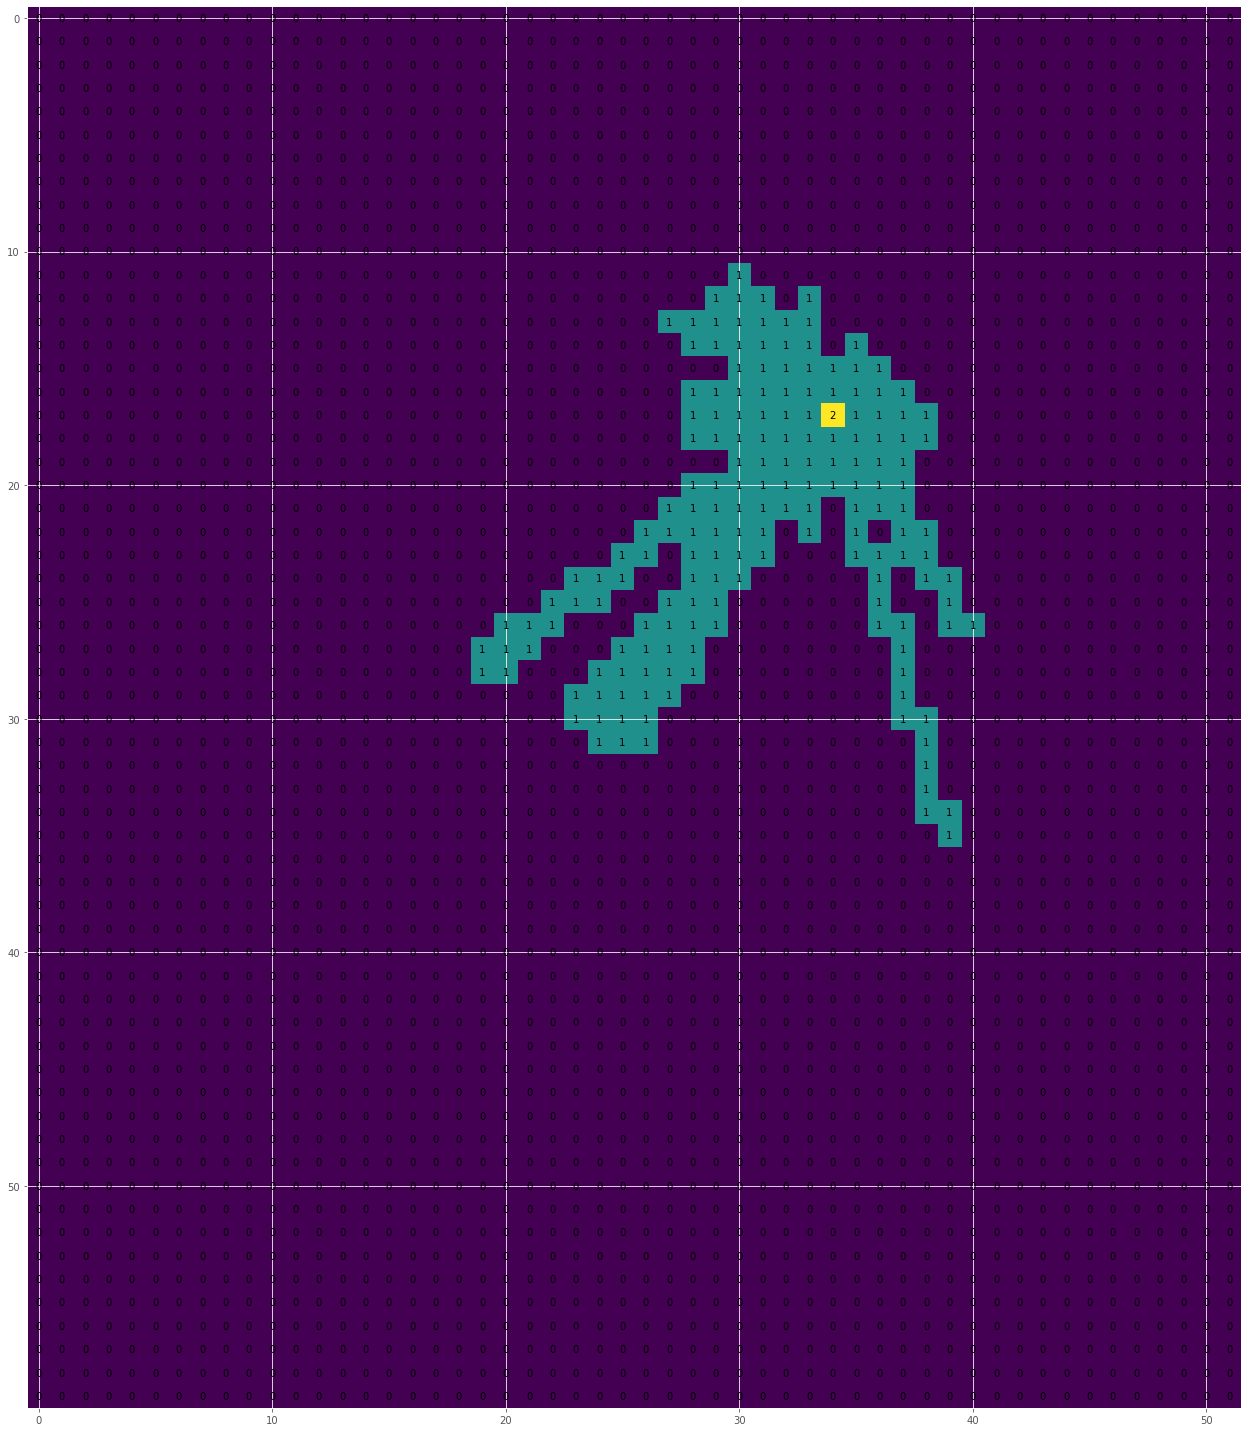

In [87]:
#am = np.argmax(res,axis=0)
ix = coords[375]
img = (1*(varmask[375]>0))
img[ix[0]][ix[1]] = 2
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(img)
for i in range((img.shape[0])):
    for j in range(img.shape[1]):
        text = ax.text(j, i,int(img[i][j]),
                       ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

In [88]:
ix

array([17, 34])

In [89]:
573
428
375
1502

1502

In [90]:
# generating the boundaries for each sensor location from a total of 4
n_sensors = 5
varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
varbound

array([[ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52]])

 The best solution found:                                                                           
 [21. 16. 27. 25. 37. 23. 37. 26. 38. 23. 39. 25.]

 Objective function:
 -10659205.454244176


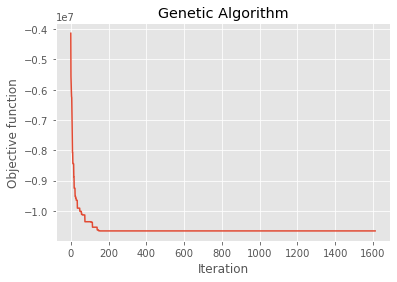

In [106]:
from geneticalgorithm import geneticalgorithm as ga


results2 = dict()
for n_sensors in range(6,7):
    varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
    dim = len(varbound)
    model01=ga(function=aptitude,algorithm_parameters={'max_num_iteration': None, 'population_size': 500, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None},dimension=dim,variable_type='int',variable_boundaries=varbound)
    model01.run()
    X = model01.output_dict["variable"]
    results2[str(n_sensors)] = X



In [81]:
#help(ga)

    

In [109]:
X

array([21., 16., 27., 25., 37., 23., 37., 26., 38., 23., 39., 25.])

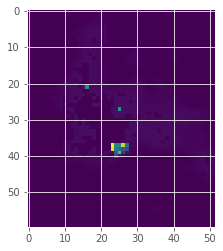

In [108]:


n_sensors = int(len(X)/2)

sensor_list = X.reshape(n_sensors,len(nonsat.shape))

sl = np.zeros(nonsat.shape)
for s in sensor_list:

    sl[int(s[0])][int(s[1])] = 1

plt.imshow(sl*np.max(W1)+W1)

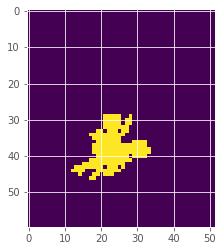

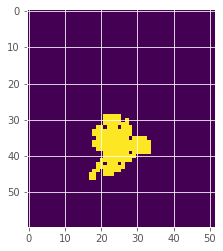

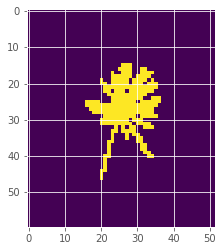

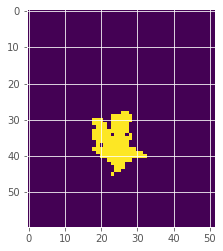

In [49]:
res = mapa(X)
empty= np.zeros((res[0].shape[0],res[0].shape[1]))
for j,i in enumerate(res):
    empty = empty + (i>0)*1
    plt.imshow((i>0))
    plt.show()

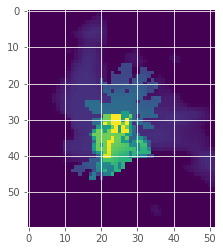

In [113]:
plt.imshow(empty*100+nonsat)

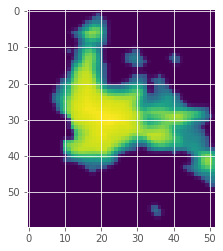

In [114]:
plt.imshow(nonsat)

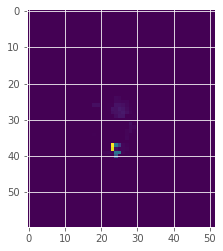

In [51]:
plt.imshow((np.sum(res,axis=0)))

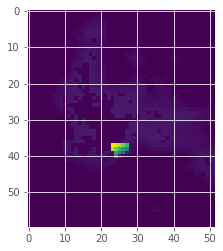

In [52]:
plt.imshow(W1)

[38. 27.]
[23. 25.]
[39. 37.]
[25. 23.]


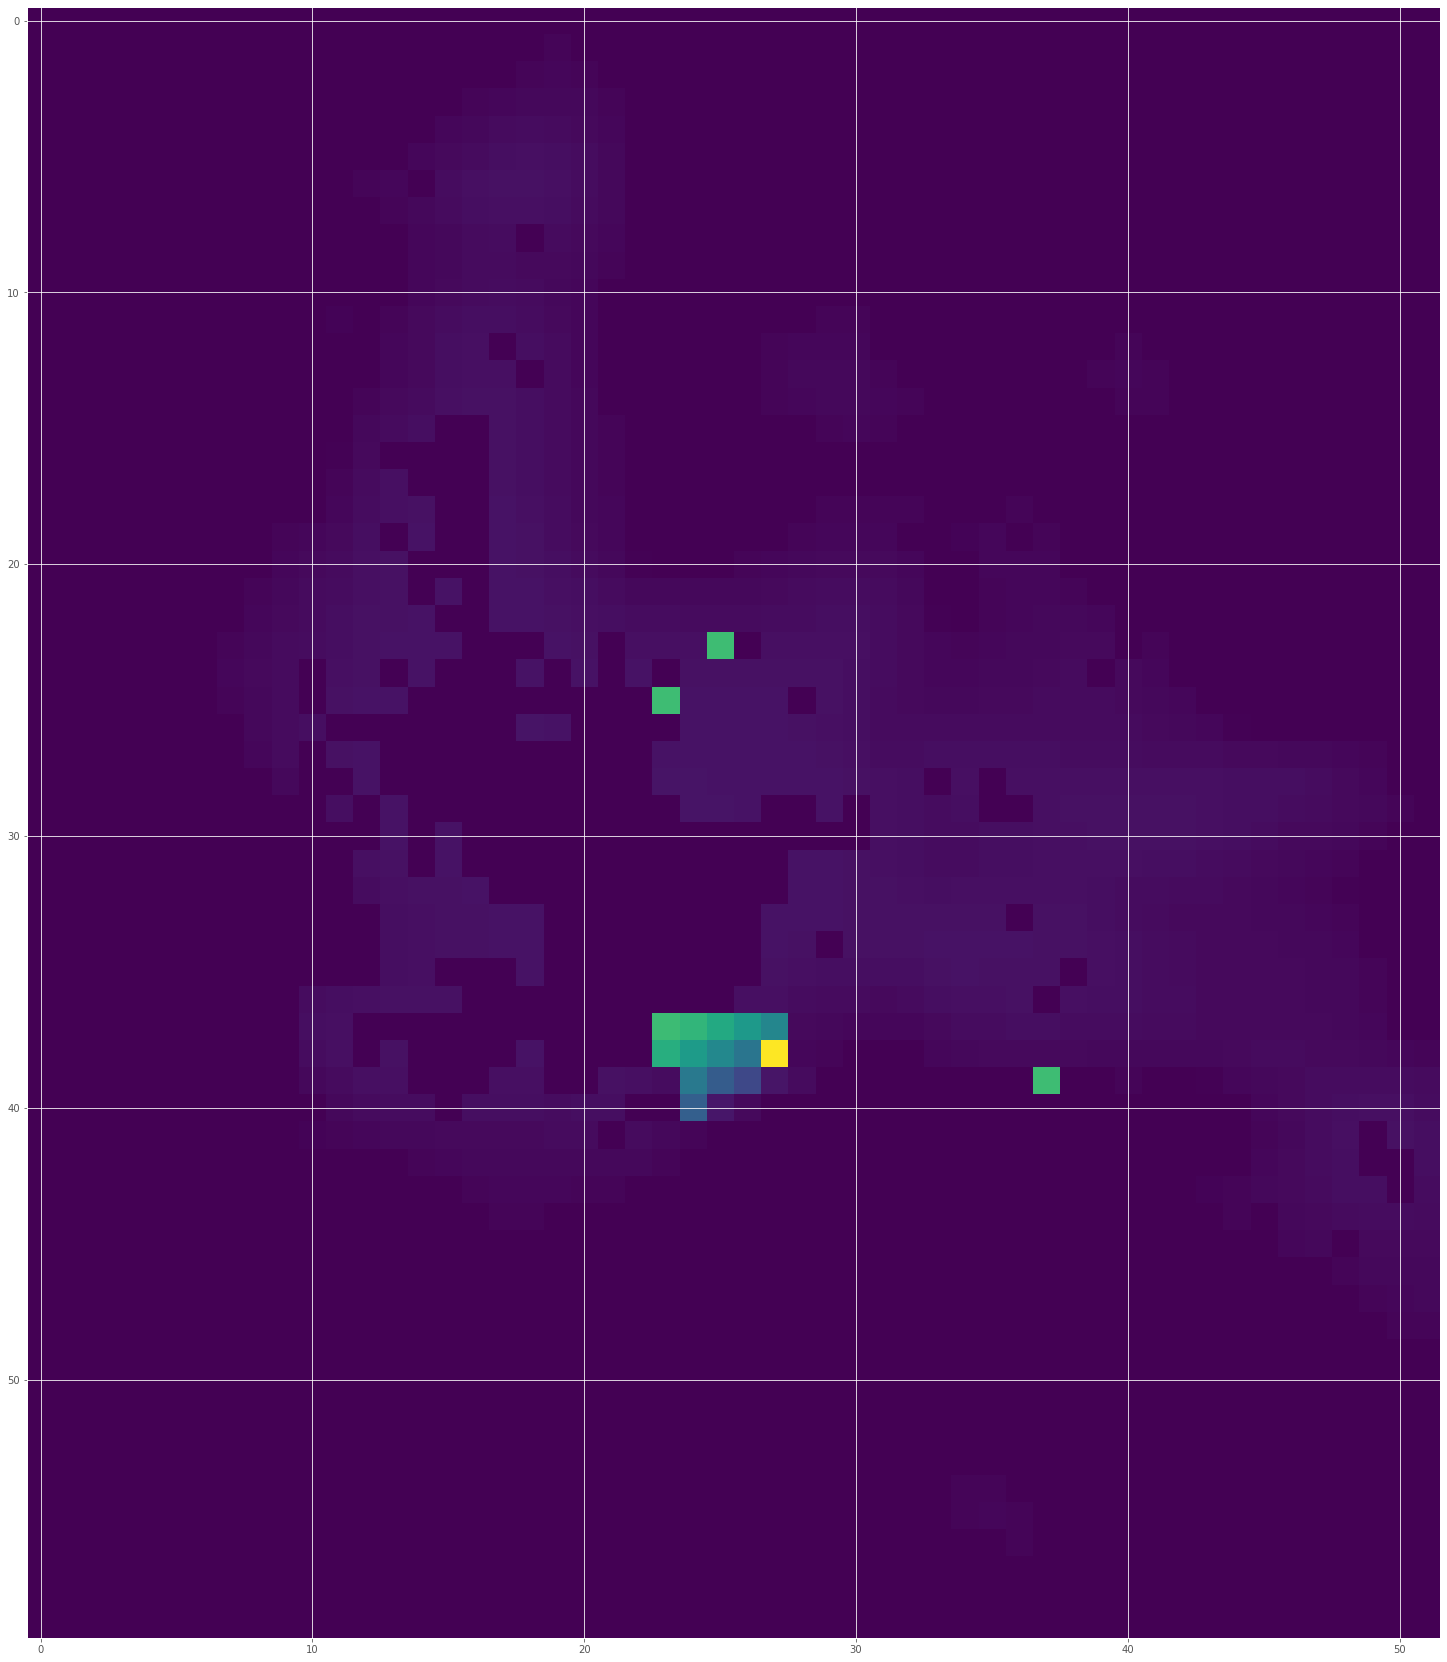

In [398]:
sensor_locations = np.zeros(nonsat.shape)
for c in X.reshape(2,int(len(X)/2)).T:
    print(c)
    sensor_locations[int(c[0])][int(c[1])]=1

plt.figure(figsize=(30,30))
plt.imshow(sensor_locations*np.max(W1)+W1)

In [546]:
n_sensors = 2
varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
dim = len(varbound)

ap={'max_num_iteration': None, 'population_size': 50, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}


In [548]:


model_2s=ga(function=aptitude,algorithm_parameters=ap,dimension=dim,variable_type='int',variable_boundaries=varbound)

model.run()
    

__________________________________________________ 0.1% GA is running...

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/rodrigo/opt/anaconda3/envs/machineLearning/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-548-b24f8ef9d6b7>", line 3, in <module>
    model.run()
  File "/Users/rodrigo/opt/anaconda3/envs/machineLearning/lib/python3.7/site-packages/geneticalgorithm/geneticalgorithm.py", line 407, in run
    obj=self.sim(ch2)
  File "/Users/rodrigo/opt/anaconda3/envs/machineLearning/lib/python3.7/site-packages/geneticalgorithm/geneticalgorithm.py", line 542, in sim
    obj=func_timeout(self.funtimeout,self.evaluate)
  File "/Users/rodrigo/opt/anaconda3/envs/machineLearning/lib/python3.7/site-packages/func_timeout/dafunc.py", line 86, in func_timeout
    thread.join(timeout)
  File "/Users/rodrigo/opt/anaconda3/envs/machineLearning/lib/python3.7/threading.py", line 1036, in join
    self._wait_for_tstate_lock(timeout=max(timeout, 0))
  File 

TypeError: object of type 'NoneType' has no len()

In [454]:

plt.imshow((np.sum(res[0]>0),axis=0)+W1)
plt.show()

SyntaxError: invalid syntax (<ipython-input-509-9c4dfa6fbf54>, line 1)

In [433]:
plt.imshow(mapa(X)[19]>0)

IndexError: index 19 is out of bounds for axis 0 with size 10

Falta minimizar traslapes

In [ ]:
for p in X.reshape(4,2):

    nonsat[int(p[0])][int(p[1])]+=100

In [ ]:
plt.imshow(nonsat)

In [54]:
import pandas as pd

fvm = [varmask[i].flatten() for i in range(len(varmask))]
#storing in data frame
df = pd.DataFrame(fvm)

c= np.array([ps.get_coords(locations[i]) for i in range(len(locations)) ])
cf = c.flatten()
coords = cf.reshape(len(locations),2)
df.insert(0,"coordsy", coords[:,0])
df.insert(1,"coordsx", coords[:,1])
df.to_csv(s+".csv")

In [ ]:
#deflaterizing
varmask_example = np.array(df.iloc[0][:]).reshape(nonsat.shape)
plt.imshow(varmask_example)

In [ ]:
df

In [ ]:
#df.to_csv("allcoversnonsatat15percent.csv")

In [484]:
df

,0,coordsx,coordsy,1,2,3,4,5,6,7,...,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119
0,29.0,16,0,30.0,33.0,34.0,35.0,36.0,37.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,17,0,29.0,30.0,33.0,34.0,35.0,36.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.0,18,0,28.0,29.0,30.0,33.0,34.0,35.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,19,0,27.0,28.0,29.0,30.0,33.0,34.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.0,20,0,26.0,27.0,28.0,29.0,30.0,33.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0.0,34,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0,27.0
1580,0.0,35,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0
1581,0.0,36,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0
1582,0.0,37,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0


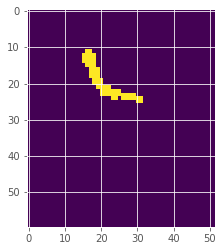

In [608]:
plt.imshow(varmask[500]>0)

$$\sum_{W}_i^{j}(\frac{1}{1/(1+var_i)})$$

$$\underset{\mathbf{U}=\{u_1,\dots,u_N\}}{\text{ arg min }} \sum_{i=1}^M \alpha_i \sum_{j=1}^{N-1} w_{u_j}^i = \sum_{j=1}^{N-1} A^T W_{u_j}$$ $$ \text{s.t. } {u_i}\in S,  ; \sum_{i=1}^M a_i= 1 : a_i>0$$

set of locations 

$$s_i \subset A$$


$$ \mathbf{S} = \{s_i\}_{i=0}^{M}$$ and $$|\mathbf{S}|=M$$

In [ ]:
A = np.zeros((4,4))
B = 

In [354]:
results

{'1': array([37., 24.]),
 '2': array([28., 26., 37., 23.]),
 '3': array([37., 23., 27., 26., 21., 16.]),
 '4': array([21., 16., 37., 23., 36., 44., 27., 26.]),
 '5': array([36., 44., 34., 37., 37., 23., 21., 16., 27., 26.]),
 '6': array([21., 16., 39., 25., 36., 44., 34., 37., 27., 26., 38., 23.]),
 '7': array([27., 26., 37., 43., 21., 16., 35., 34., 37., 23., 32., 16., 30.,
        39.]),
 '8': array([ 6., 19., 36., 44., 27., 26., 32., 16., 34., 37., 37., 23., 28.,
        39., 21., 16.]),
 '9': array([30., 41., 35., 34., 41., 25.,  6., 19., 36., 44., 37., 23., 27.,
        26., 21., 16., 32., 16.])}

In [367]:
import json
data = list(results["1"])
a_file = open("data2.json", "w")
a_file = json.dump(data, a_file)

data = list(results["2"])
a_file = open("data2.json", "w")
a_file = json.dump(data, a_file)


a_file = open("data2.json", "r")
a_dictionary = json.load(a_file)



print(a_dictionary)

[28.0, 26.0, 37.0, 23.0]


In [368]:
list(data)

[28.0, 26.0, 37.0, 23.0]

In [378]:
r = list([])

for i,res in enumerate(results):
    print(results[str(i+1)])
    r[i+1] = list(results[str(i+1)])
    
    

[37. 24.]


IndexError: list assignment index out of range

In [377]:
list(results[str(i+1)])

[37.0, 24.0]